In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
%matplotlib inline

In [2]:
df=pd.read_csv('/Users/macintoshhd/Downloads/lendingclub_sample.csv')
df['int_rate']=df['int_rate'].str.strip('%')

In [3]:
df.head()

,id,member_id,loan_amnt,term,emp_title,emp_length,home_ownership,annual_inc,verification_status,purpose,...,pub_rec,open_acc,total_acc,acc_now_delinq,tot_coll_amt,revol_bal,revol_util,total_credit_rv,tot_cur_bal,int_rate
0,55441634,59043359.0,18000.0,60 months,driver/wharehouseman,10+ years,MORTGAGE,68000.0,Source Verified,medical,...,1.0,15.0,19.0,0.0,0.0,13266.0,64.4%,20600.0,253482.0,17.86
1,38595688,41379463.0,18000.0,60 months,Supervisor,3 years,MORTGAGE,58000.0,Source Verified,debt_consolidation,...,1.0,16.0,32.0,0.0,0.0,18703.0,58.1%,32200.0,159046.0,16.49
2,38455988,41249804.0,16000.0,36 months,Mail Clerk,9 years,OWN,49000.0,Not Verified,credit_card,...,0.0,11.0,14.0,0.0,0.0,14864.0,91.2%,16300.0,155379.0,12.69
3,40362356,43227157.0,4000.0,36 months,MANAGER INTERMODAL OPERATIONS,10+ years,RENT,85000.0,Source Verified,debt_consolidation,...,2.0,15.0,55.0,0.0,0.0,6912.0,55.3%,12500.0,68231.0,12.39
4,54207722,57748458.0,6000.0,36 months,Management,10+ years,MORTGAGE,75000.0,Not Verified,debt_consolidation,...,0.0,9.0,27.0,0.0,0.0,12104.0,76.6%,15800.0,253166.0,7.89


In [4]:
df.columns

Index(['id', 'member_id', 'loan_amnt', 'term', 'emp_title', 'emp_length',
       'home_ownership', 'annual_inc', 'verification_status', 'purpose',
       'zip_code', 'addr_state', 'dti', 'delinq_2yrs', 'earliest_cr_line',
       'inq_last_6mths', 'mths_since_last_delinq',
       'mths_since_last_major_derog', 'mths_since_last_record', 'pub_rec',
       'open_acc', 'total_acc', 'acc_now_delinq', 'tot_coll_amt', 'revol_bal',
       'revol_util', 'total_credit_rv', 'tot_cur_bal', 'int_rate'],
      dtype='object')

# a

In [5]:
df['int_rate']=pd.to_numeric(df['int_rate'])
df['int_rate'].describe()

count    99999.000000
mean        12.768029
std          4.392747
min          5.320000
25%          9.170000
50%         12.390000
75%         15.610000
max         28.990000
Name: int_rate, dtype: float64

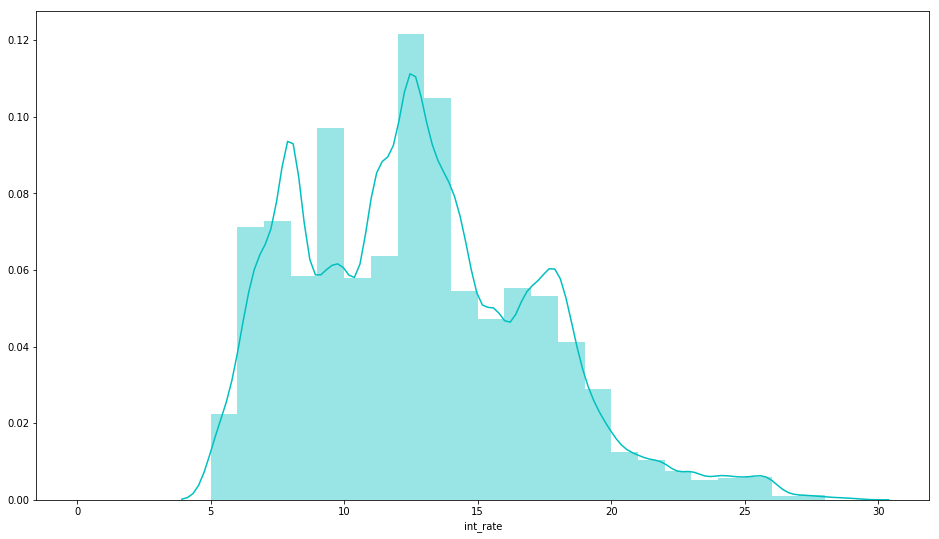

In [6]:
plt.figure(figsize=(16,9))
sns.distplot(df['int_rate'],bins=np.arange(df['int_rate'].max()),color="c")

The highest interest rate is 28.99% in this dataset and the minimum value of interest rate is 5.32%, which means that the range of interest rate is 23.76%. The mean of interest rate is 12.76%.

From the plot, we can konw that most of the interest rate in sample dataset fall between 5%-20%. The most frequent interest rate is about 13%, 14% following. The number of cases decrease when interest rate increases after 17%.

# b

In [7]:
df.term.unique()

array([' 60 months', ' 36 months'], dtype=object)

Text(0.5,0,'term')

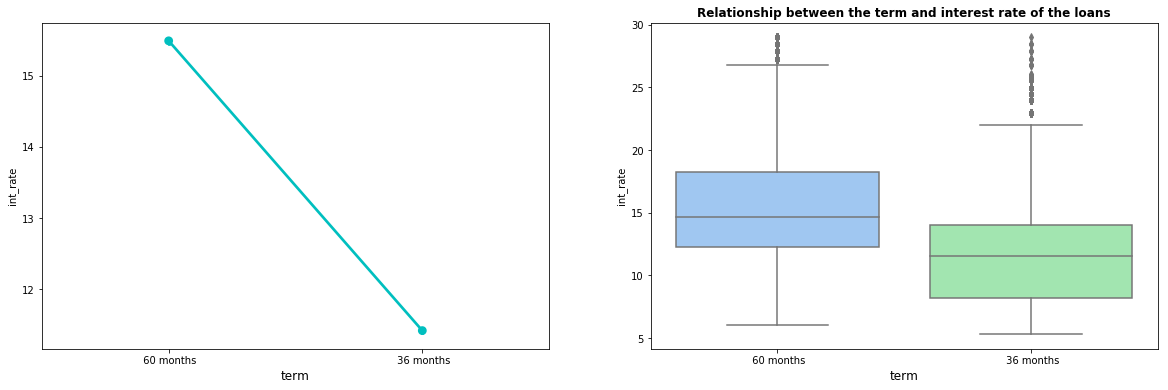

In [8]:
fig, ax = plt.subplots(1, 2, sharex=True, figsize=(20,6))
plt.title('Relationship between the term and interest rate of the loans',fontweight='bold', fontsize=12);
sns.pointplot(x='term', y='int_rate', data=df,ax=ax[0],color="c")
sns.boxplot(x='term', y='int_rate', data=df, palette=sns.color_palette('pastel'),ax=ax[1])
ax[0].set_xlabel('term', fontsize=12)
ax[1].set_xlabel('term', fontsize=12)

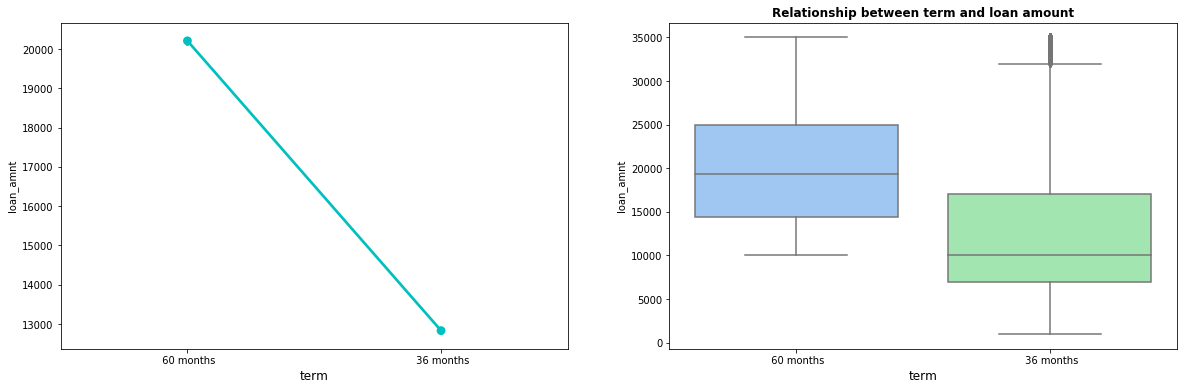

In [9]:
fig, ax = plt.subplots(1, 2, sharex=True, figsize=(20,6))
sns.pointplot(x='term', y='loan_amnt', data=df,ax=ax[0],color="c")
sns.boxplot(x='term', y='loan_amnt', data=df, palette=sns.color_palette('pastel'))
ax[0].set_xlabel('term', fontsize=12)
ax[1].set_xlabel('term', fontsize=12)
plt.title('Relationship between term and loan amount', fontweight='bold', fontsize=12);

In [10]:
# From the plot, we can know that comparing with 60-month term, interest rate and loan amount is lower of 36-month term. Generally, the shorter the term, the smaller of the loan amount. Also, the shorter the term, the less risk of loan default and thus lower interest rate..

# c

In [11]:
df['purpose'].value_counts()

debt_consolidation    60108
credit_card           23878
home_improvement       5905
other                  4343
major_purchase         1752
medical                 842
small_business          792
car                     787
moving                  608
vacation                581
house                   348
renewable_energy         54
wedding                   1
Name: purpose, dtype: int64

Text(0.5,0,'purpose')

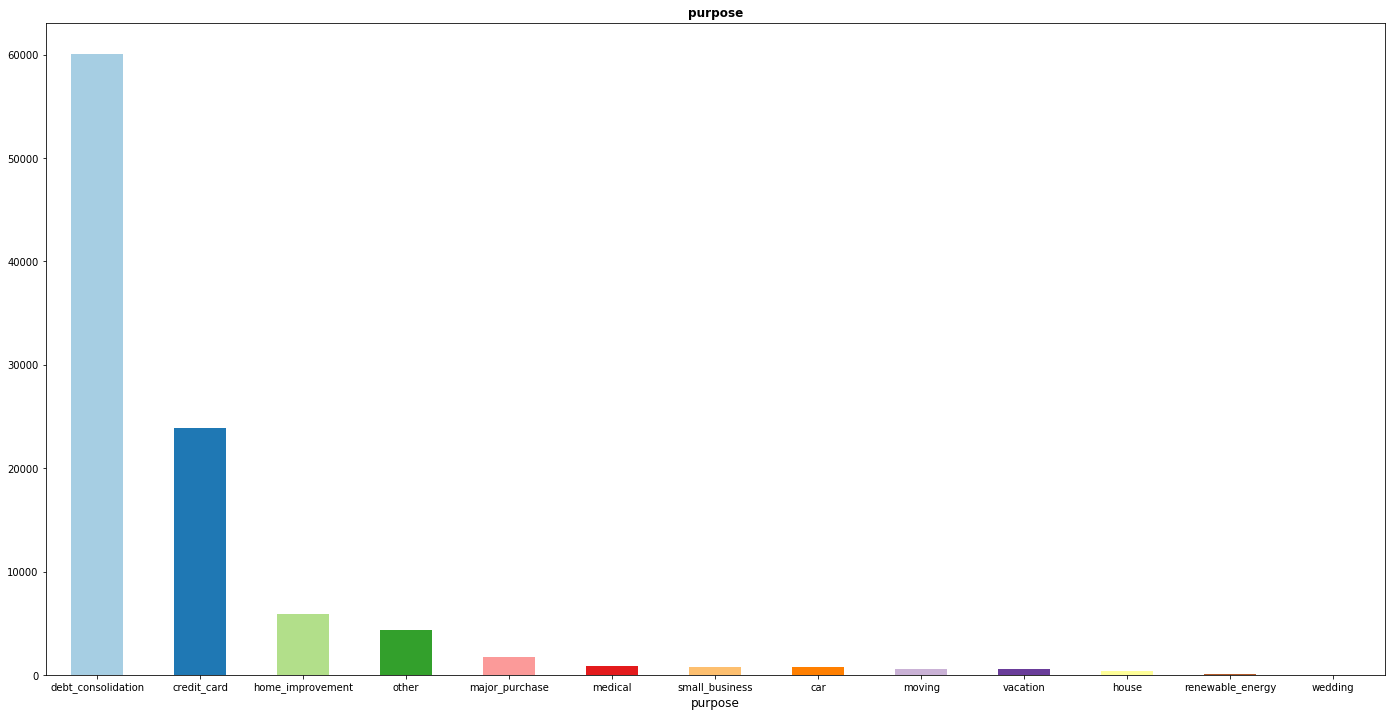

In [12]:
df['purpose'].value_counts().plot(kind='bar', figsize=(24,12), rot=0, color=[plt.cm.Paired(np.arange(len(df['purpose'].unique())))])
plt.title('purpose', fontweight='bold', fontsize=12)
plt.xlabel('purpose', fontsize=12)

Most of the loans are used for debt_consolidation purpose and for credit_card following. Only one borrower applied loan foe their wedding. 

In [13]:
df.groupby(['purpose'])['int_rate'].mean().sort_values(ascending=False)

purpose
wedding               25.990000
house                 17.547069
small_business        17.092235
renewable_energy      16.243148
moving                15.708026
other                 14.579417
medical               13.993349
vacation              13.584096
debt_consolidation    13.183126
home_improvement      12.760588
major_purchase        12.567340
car                   11.888806
credit_card           11.079774
Name: int_rate, dtype: float64

Text(0.5,0,'purpose')

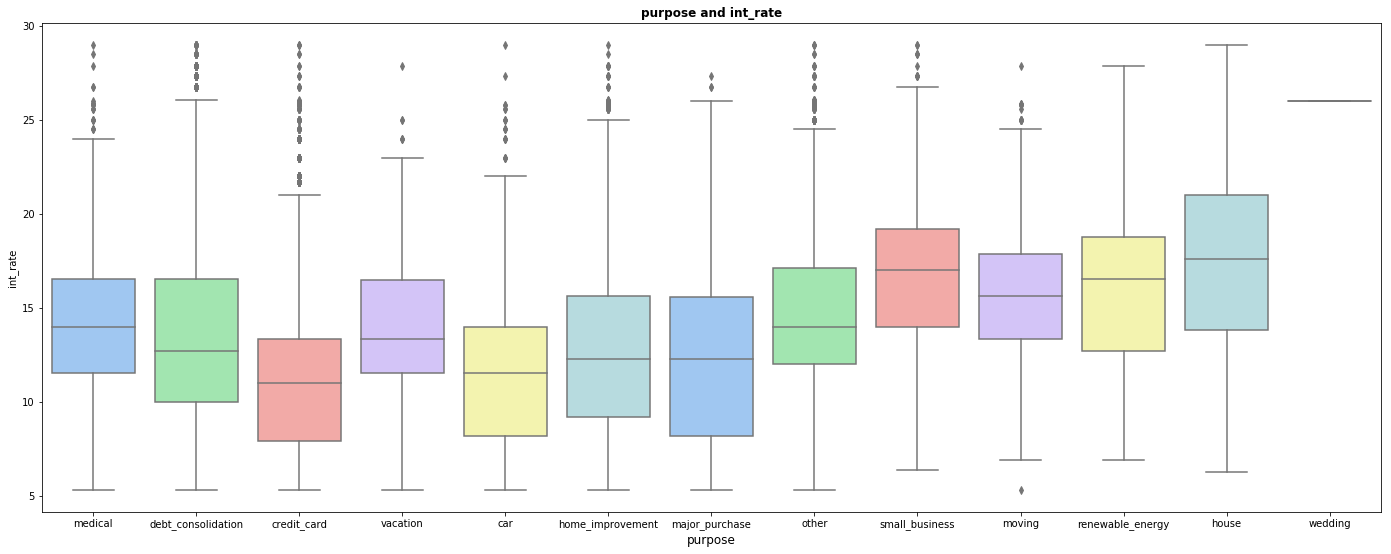

In [14]:
plt.figure(figsize=(24,9))
sns.boxplot(x='purpose', y='int_rate', data=df, palette=sns.color_palette('pastel'))
plt.title('purpose and int_rate', fontweight='bold', fontsize=12)
plt.xlabel('purpose', fontsize=12)

Text(0.5,0,'purpose')

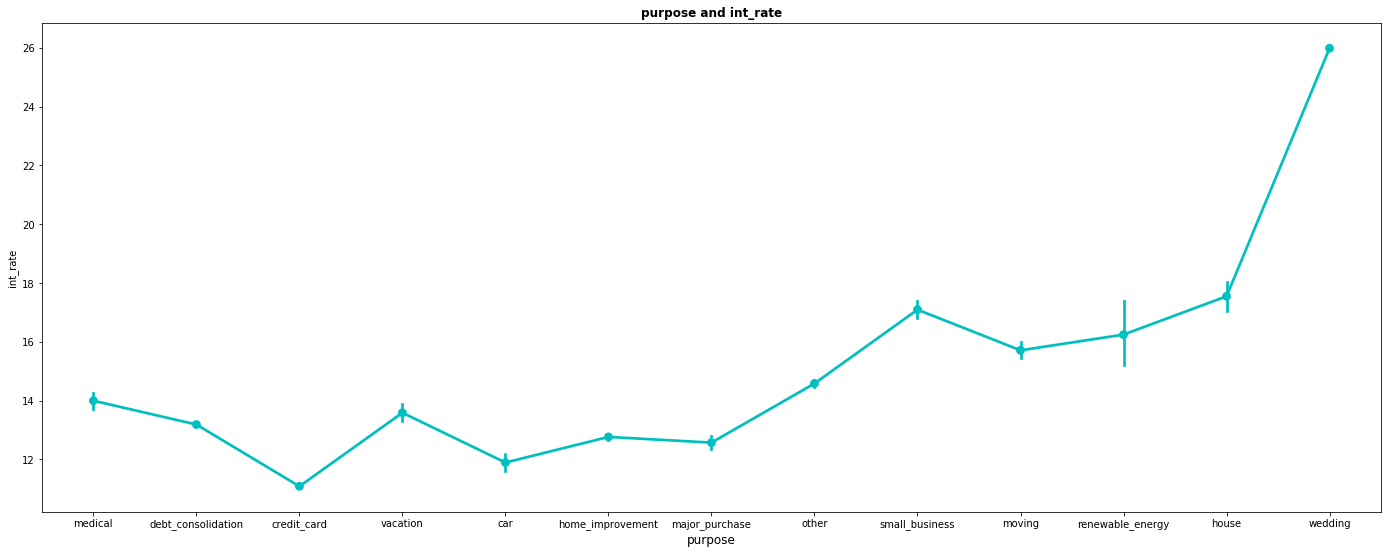

In [15]:
plt.figure(figsize=(24,9))
sns.pointplot(x='purpose', y='int_rate', data=df,color="c")
plt.title('purpose and int_rate', fontweight='bold', fontsize=12)
plt.xlabel('purpose', fontsize=12)

The mean interest rate for wedding is highest among other purposes and housing following. The reason that wedding purpose has highest interest rate is that only one case in dataset is for wedding purpose, so the case have huge influence. Borrower who cannot afford their wedding has higher risk of loan default and there is no pledge for such loan purpose. The reason of housing is that the number of cases of hosing purpose is small in dataset and the housing market is not optimistic in these years, so lending money for housing purpose is more risky. The interest rate for credit_card purpose is that a lot of cases in dataset is for credit card purpose and thus the mean will be smaller, and that the lowest because people who have credit card have been evaluated by credit card organization and probably have more complete credit records. Therefore, the interest rate for credit card is lowest.  The range of interest rate for house is the largest because house value can vary greatly.

In [16]:
df.groupby(['purpose'])['loan_amnt'].mean().sort_values(ascending=False)

purpose
wedding               23100.000000
small_business        16247.348485
credit_card           16065.720538
debt_consolidation    15711.832868
home_improvement      14840.469941
house                 14738.290230
major_purchase        13131.207192
other                 10461.892701
renewable_energy      10237.500000
car                   10229.606099
medical                9287.767221
moving                 8379.152961
vacation               6592.039587
Name: loan_amnt, dtype: float64

Text(0.5,0,'purpose')

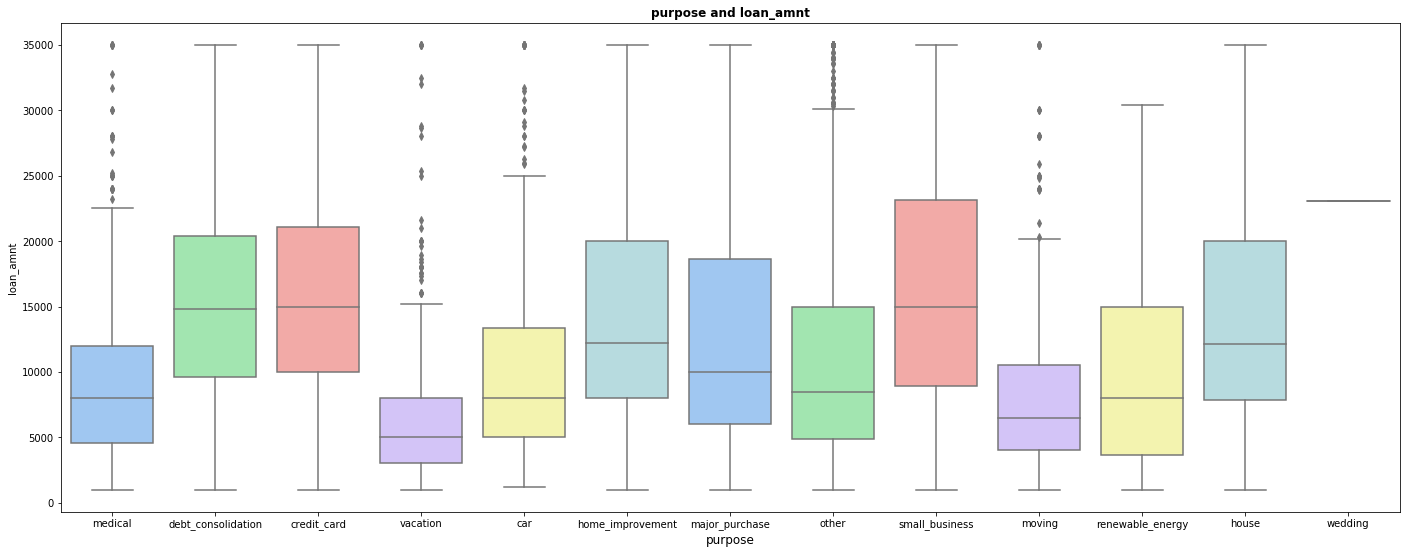

In [17]:
plt.figure(figsize=(24,9))
sns.boxplot(x='purpose', y='loan_amnt', data=df, palette=sns.color_palette('pastel'))
plt.title('purpose and loan_amnt', fontweight='bold', fontsize=12)
plt.xlabel('purpose', fontsize=12)

Text(0.5,0,'purpose')

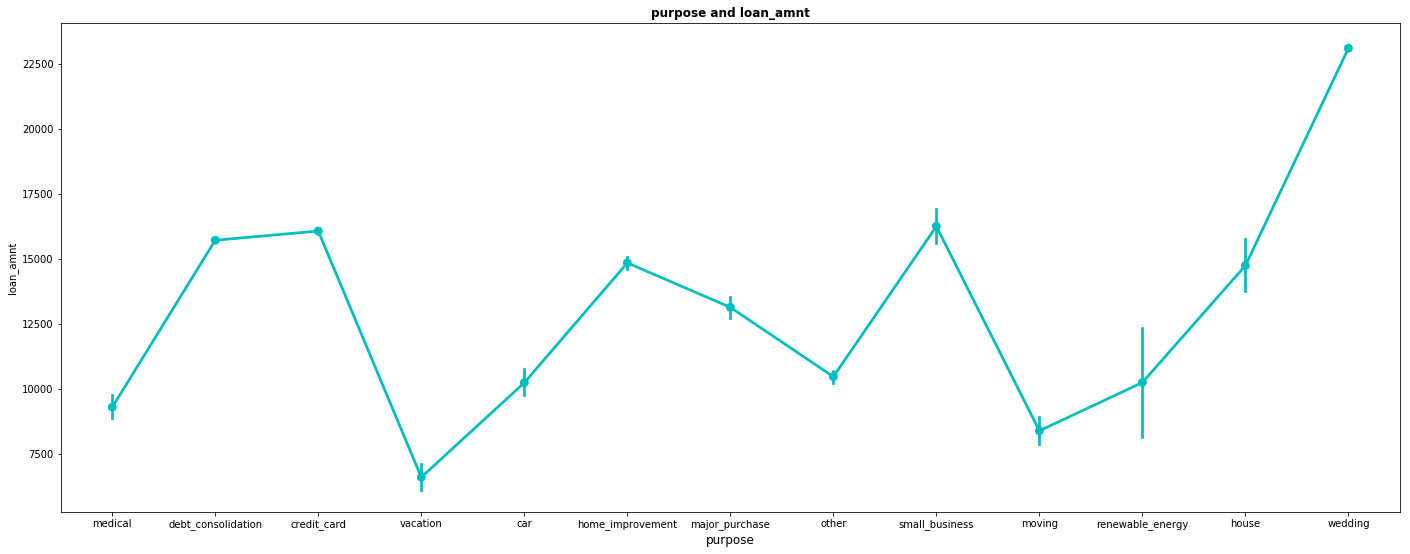

In [18]:
plt.figure(figsize=(24,9))
sns.pointplot(x='purpose', y='loan_amnt', data=df,color="c")
plt.title('purpose and loan_amnt', fontweight='bold', fontsize=12)
plt.xlabel('purpose', fontsize=12)

The mean loan amount for wedding purpose is highest among the other purpose and small business following.The large loan amount for small business purpose is that fund requirement of running small businss is large. The large loan amount for credit_card purpose is that a lot of cases in dataset is for credit card purpose and thus the mean will be smaller, and that the lowest because people who have credit card have been evaluated by credit card organization and probably have more complete credit records. The reason that wedding purpose has highest loan amount is that only one case in dataset is for wedding purpose so the case have huge influence. The mean loan amount for vocation is smallest because fund requirement for vocation is not large.

# d

In [19]:
import datetime as dt
df['earliest_cr_line']=pd.to_datetime(df['earliest_cr_line'])
data_dt= dt.datetime(year=2015,day=30,month=9)
df['length']=(data_dt-df['earliest_cr_line'])
df['length']=df['length'].dt.days.astype(int)/365.25
df.insert(30,'credit_history',pd.cut(df['length'],np.arange(0,70,5)))
df.head()

,id,member_id,loan_amnt,term,emp_title,emp_length,home_ownership,annual_inc,verification_status,purpose,...,total_acc,acc_now_delinq,tot_coll_amt,revol_bal,revol_util,total_credit_rv,tot_cur_bal,int_rate,length,credit_history
0,55441634,59043359.0,18000.0,60 months,driver/wharehouseman,10+ years,MORTGAGE,68000.0,Source Verified,medical,...,19.0,0.0,0.0,13266.0,64.4%,20600.0,253482.0,17.86,15.912389,"(15, 20]"
1,38595688,41379463.0,18000.0,60 months,Supervisor,3 years,MORTGAGE,58000.0,Source Verified,debt_consolidation,...,32.0,0.0,0.0,18703.0,58.1%,32200.0,159046.0,16.49,17.911020,"(15, 20]"
2,38455988,41249804.0,16000.0,36 months,Mail Clerk,9 years,OWN,49000.0,Not Verified,credit_card,...,14.0,0.0,0.0,14864.0,91.2%,16300.0,155379.0,12.69,12.829569,"(10, 15]"
3,40362356,43227157.0,4000.0,36 months,MANAGER INTERMODAL OPERATIONS,10+ years,RENT,85000.0,Source Verified,debt_consolidation,...,55.0,0.0,0.0,6912.0,55.3%,12500.0,68231.0,12.39,22.658453,"(20, 25]"
4,54207722,57748458.0,6000.0,36 months,Management,10+ years,MORTGAGE,75000.0,Not Verified,debt_consolidation,...,27.0,0.0,0.0,12104.0,76.6%,15800.0,253166.0,7.89,23.077344,"(20, 25]"


In [20]:
df['length'].describe()

count    99999.000000
mean        17.134729
std          7.587571
min          3.162218
25%         11.912389
50%         15.581109
75%         21.078713
max         65.163587
Name: length, dtype: float64

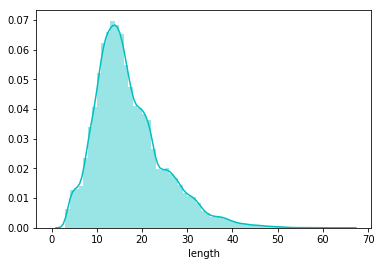

In [21]:
sns.distplot(df['length'],bins=np.arange(df['length'].max()),color="c")

In the sample data set, the max credit history is 65.16 years and the minimum is 3.16 years, so the range is 62 year. The mean of credit history is 17.13 years. Most of the cases in the dataset fall between 10-20 year.

Text(0.5,1,'credit history and int_rate')

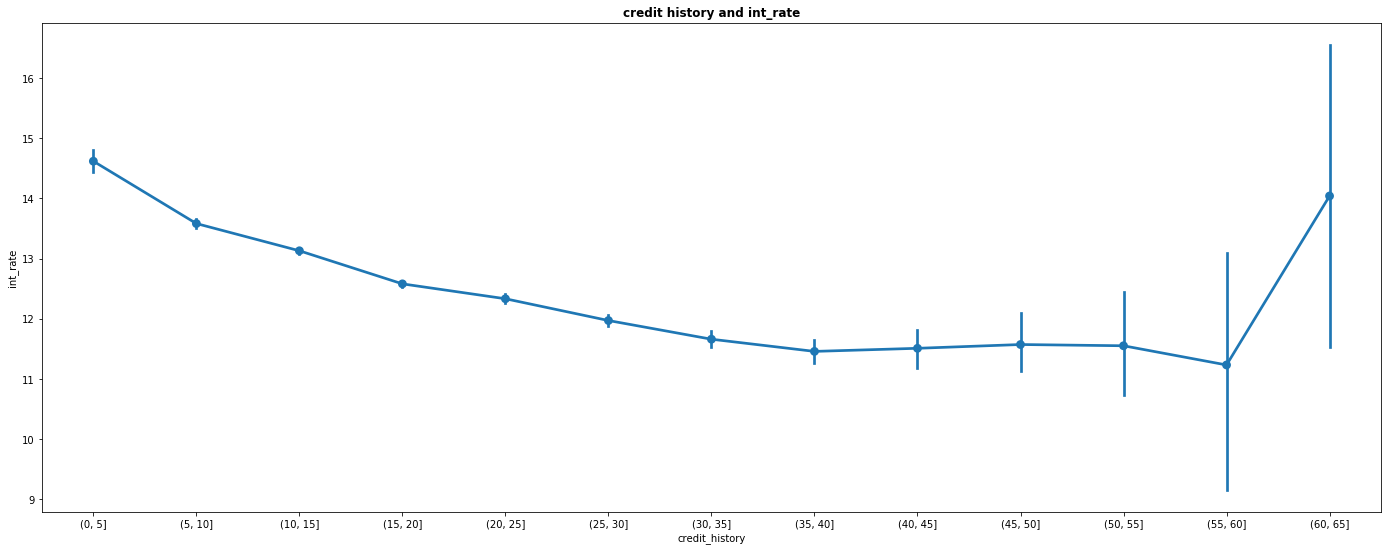

In [22]:
plt.figure(figsize=(24,9))
sns.pointplot(x='credit_history', y=df['int_rate'], data=df)
plt.title('credit history and int_rate', fontweight='bold', fontsize=12)

From the graph, we can know that the interest rate decreases along with increasing credit history, but decrease after credit interval [55,60]. Normally, the longer your credit history, the more accurate lender can be in determining the level of risk it takes. Thus, long and good credit history enable borrower a lower interest rate. However, after credit history longer than 60 years, borrowers are old and may be retired. Therefore, their repayment ability decrease. Under such circumstance, lenders tend to increase interest rate to pretect their interest.

# e

In [23]:
df['annual_inc'].describe()

count    9.999900e+04
mean     7.603143e+04
std      6.861456e+04
min      3.000000e+03
25%      4.600000e+04
50%      6.500000e+04
75%      9.000000e+04
max      9.500000e+06
Name: annual_inc, dtype: float64

In [24]:
df.insert(30,'annual_income',pd.cut(df['annual_inc'],np.arange(0,9500000,5)))

In [25]:
df['annual_income'].head()

0    (67995, 68000]
1    (57995, 58000]
2    (48995, 49000]
3    (84995, 85000]
4    (74995, 75000]
Name: annual_income, dtype: category
Categories (1899999, interval[int64]): [(0, 5] < (5, 10] < (10, 15] < (15, 20] ... (9499975, 9499980] < (9499980, 9499985] < (9499985, 9499990] < (9499990, 9499995]]

In [ ]:
plt.figure(figsize=(24,9))
sns.pointplot(x='annual_income', y=df['int_rate'], data=df)
plt.title('annualincome and int_rate', fontweight='bold', fontsize=12)